# Clustering

In the previous subtask, we have explored one category of unsupervised machine learning models: dimensionality reduction. Here we will move on to another class of unsupervised machine learning models: clustering algorithms. The main idea behind clustering is pretty straightforward. Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points. Basically, we say to ourselves, "I have these points here, and I think that they organize into groups. It would be nice to describe these things more concretely, and, when a new point comes in, assign it to the correct group." This general idea encourages exploration and opens up a variety of algorithms for clustering.

<figure><img align="center" src="https://habrastorage.org/getpro/habr/post_images/8b9/ae5/586/8b9ae55861f22a2809e8b3a00ef815ad.png"><figcaption>*The examples of the outcomes from different algorithms from scikit-learn*</figcaption></figure>

The algorithms listed above do not cover all the clustering methods out there, but they are the most commonly used ones. Today we will go into further detail for the K-means Clustering which is the most popular clustering algorithm.

## K-means clustering


As our first example of an unsupervised learning algorithm in the domain of clustering, we're going to consider the k-means clustering algorithm. K-means algorithm is the most popular and yet simplest of all the clustering algorithms. Before presenting the formal setting, though, we'll consider k-means clustering from a more visual/geometric standpoint, just as a way to cluster data points. The goal of the k-means algorithm is to find a set of $k$ "centers" within an unlabeled multidimensional dataset (that is, points $\mu^{(i)} \in \mathbb{R}^n$), where $k$ is a a pre-determined number. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the **k**-means model. By doing so, we can also associate each point with its closest center, and use this as an indication of which cluster it belong to. Thus, using a *k*-means model we are also able to classify new data points. 

Here is how it works:

**Algorithm**: K-means

**Given:** Data set $x^{(i)}, i=1,\ldots,m$

**Initialize:**
1. Select the number of clusters $k$ that you think is the optimal number.  
   
2. Initialize $k$ points as "centroids" randomly within the space of our data.  
    $\mu^{(j)} := \mbox{RandomChoice}(x^{(1:m)}), \; j=1,\ldots,k$  

**Repeat until convergence:**
3. Attribute each observation to its closest centroid.  
    $y^{(i)} := argmin_j \|\mu^{(j)} - x^{(i)}\|_2^2, \; i=1,\ldots,m$
4. Update the centroids to the center of all the attributed set of observations.   
    $\displaystyle \mu^{(j)} := \sum_{i=1}^m \frac{x^{(i)} \mathrm{1}\{y^{(i)} = j\}}{\mathrm{1}\{y^{(i)} = j\}}, \;\; j=1,\ldots,k$
5. Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).

What is the _loss function_ we are optimizing here? It is the sum of distances of each point to its closest centroid. Although we won't prove this formally here, at each step the algorithm is guaranteed to _decrease_ the loss function (the intuition is that each step, both cluster re-assignment, and computing new centers, can only decrease the total loss, and so the overall loss will only decrease in this manner).  Further, because there are only a finite number of possible clusterings (exponentially large, of course, but still finite), we know the algorithm _will_ converge after a finite number of steps (i.e., the cluster assignments will stay constant from one iteration to the next, which means the centers will also not change, and the algorithm has reached a fixed point).




In the following figure you can see what should happen in each iteration of the k-Means algorithm. 
<figure><img align="center" src="img\05.11-expectation-maximization.png">

**Question:** Describe in your own words what happens when using k-Means.

**Answer:** After k random center points are set, all datapoints are assigned to the center point closest to them, creating separate clusters. In the next step the new centers for each cluster are found by calculating the mean of all points lying within the specific cluster. For the next step all datapoints are reassigned to their new nearest center before yet again the new centers are specified according to the new distribution. This is repeated until the centers don't change anymore.


## Developing a simple k-Means implementation
First of all we have to load all required libraries and our data. We begin with the standard imports: numpy, pyplot, seaborn and scikitlearn-datasets.

In [1]:
# Import numpy, pyplot, datasets
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display
import ipywidgets as widgets
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

As the next step let's generate a two-dimensional dataset containing four distinct blobs. We will use the following set of 300 data points. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization.

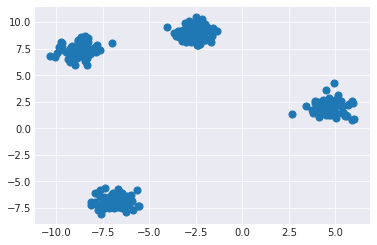

In [70]:
from sklearn.datasets.samples_generator import make_blobs
RANDOM_STATE = 42
X_blob, y_blob = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=RANDOM_STATE)
plt.scatter(X_blob[:, 0],X_blob[:, 1], s=50);

Fill in the following code to write a simple implementation of k-Means on your own!

In [115]:
# use the following import to simplify the implementation
from sklearn.metrics import pairwise_distances_argmin

# 1. Select the number of clusters: This has to be done before the function is called
# rseed is the seed for generation of random numbers
def find_clusters(X, n_clusters, rseed):
    
    # 2. Initialize k points as "centroids" randomly 
    # Please initialize the random number generator with specified random state
    # STUDENT CODE HERE
    
    centers = np.array([X[i] for i in np.random.RandomState(rseed).choice(300, n_clusters)])
    centers_old = np.zeros(centers.shape)
    
    center_change = np.linalg.norm(centers - centers_old)
    
    while center_change != 0:
        # Measure the distance from each datapoint to every center       
        labels = pairwise_distances_argmin(X,centers)
        X_labeled = np.c_[X,labels]
    
        centers_old = centers
        # Calculate mean for every cluster and update the center
        for i in range(n_clusters):
            centers[i] = np.mean(X[labels == i], axis=0)
            
        center_change = np.linalg.norm(centers - centers_old)

    # STUDENT CODE until HERE    
    # return the cluster centers and the labels
    return centers, labels


### Analyzing Blob Data 
Use your function to calculate a clustering of the data generated above. The random seed is already fixed. Visualize the found cluster labels with different colors. As we have generated the data on our own, we know how many clusters we want to find. So, what value do we have to specify for k?

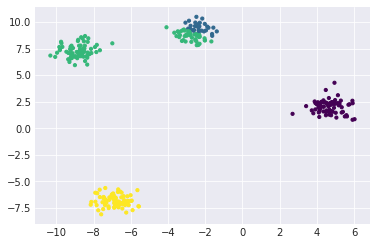

In [137]:
RANDOM_STATE = 42
# STUDENT CODE HERE

centers_blob, labels_blob = find_clusters(X_blob, 4, RANDOM_STATE)

plt.scatter(X_blob[:, 0],X_blob[:, 1], c=labels_blob, s=10, cmap='viridis');

# STUDENT CODE until HERE

**Question:** Experiment with the random seed. What do you observe? What could we do to overcome this?

**Answer:** The resulting clusters change with different random seeds. We can overcome this by not using random points as centers in the beginning.


### Analyzing another synthetic dataset
We generated our first dataset with the function *make_blobs*. To get a better feeling on the properties of k-Means, we want to analyze the results with another dataset. We import the *make_moons* function from sklearn datasets and generate another dataset, consisting of 300 samples. The noise value to $0.05$ to include some deviation in our dataset. Use your function to cluster the data and search for two clusters. Show the result in a scatter plot.



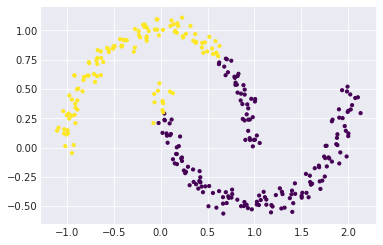

In [138]:
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(300, noise=.05, random_state=RANDOM_STATE)
# STUDENT CODE HERE

centers_moon, labels_moon = find_clusters(X_moon, 2, RANDOM_STATE)

plt.scatter(X_moon[:, 0],X_moon[:, 1], c=labels_moon, s=10, cmap='viridis');


# STUDENT CODE until HERE

**Question:** What do you notice? Can you explain why this happens? What constraint of the k-Means algorithm is leading to that result?

**Answer:** Some of the data is (probably) falseley labeled. This happens because the k-Means algorithm only takes the distance from each datapoint to the centers into account but not the distances of the data within the cluster.


**Question:** What happens if we set the value of k to four instead of two?

**Answer:** The dataset is divided into four clusters instead of two.


Whether the result is meaningful is a question that is difficult to answer definitively. We will get to know different approaches in the following tasks.

## Evaluating a clustering

As stated in the beginning of todays lab, the evaluation of clustering results is difficult. Considering the synthetic datasets we have generated above, we have got labeled data since the blobs / moons can be seen as given classes (clusters). We can check the correspondence of our clustering results with the given label. But in general, we use unsupervised methods if we don't have labels for our data, so what can we do if there is no label to check against? We are only able to evaluate our clustering if we can define a measure of quality of a clustering. The evaluation of a clustering reveals information on how many clusters should be searched for. There are *internal* and *external* goodness metrics. External metrics use the information about the known true split (we have labels) while internal metrics do not use any external information and assess the goodness of clusters based only on the initial data. The optimal number of clusters is usually defined with respect to some internal metrics. 

### Using given labels in a simple table
At first, we use the given information of the labels. For this purpose, we can can use __cross-tabulation__     which is a method to quantitatively analyze the relationship between multiple variables. In our case, the two variables are our labels and the estimated clusters.

- Get the lists of clustering results for the blob dataset and label data
- Use the *pandas* library to perform the cross-tabulation. 
- Set the index and columns of the table correctly. The index should show the true / real cluster, and the column should describe to which cluster the points were allocated.

In [119]:
# STUDENT CODE HERE

pd.crosstab(y_blob, labels_blob, rownames=['labels'], colnames=['estimated clusters'])

# STUDENT CODE until HERE

estimated clusters,0,1,2,3
labels,,,,
0,0,31,44,0
1,75,0,0,0
2,0,0,0,75
3,0,0,75,0


**Question:** Do the clusters correspond to the real classes?

**Answer:** Class one corresponds to our cluster 0, class two corresponds to cluster 3 and class 3 corresponds to our cluster 2. In conclusion class zero has to correspond to our cluster one however this is not entirely the case in our results.


### Measuring clustering quality without labels: Silhouette Coefficient

In contrast to the metric described above, the Silhouette coefficient does not imply the knowledge about the true labels of the objects. It lets us estimate the quality of the clustering using only the initial, unlabeled sample and the clustering result. To start with, for each observation, the silhouette coefficient is computed. Let $a$ be the mean of the distance between an object and other objects within one cluster and $b$ be the mean distance from an object to objects from the nearest cluster (different from the one the object belongs to). Then the silhouette measure for this object is $$s = \frac{b - a}{\max(a, b)}.$$

The silhouette of a sample is a mean value of silhouette values from this sample. Therefore, the silhouette distance shows to which extent the distance between the objects of the same class differ from the mean distance between the objects from different clusters. This coefficient takes values in the $[-1, 1]$ range. Values close to -1 correspond to bad clustering results while values closer to 1 correspond to dense, well-defined clusters. Therefore, the higher the silhouette value is, the better the results from clustering.

**Question:** Calculate the silhouette coefficient and get the result for the value of $k$ we selected above. What conclusion can we draw here? Hint: use scikit-learn for the calculation.

**Answer:** The clustering of the blob generated data with k=4 has a silhouette coefficient of 0.58. Since it is above zero it means that none of the samples have been assigned to a completely wrong cluster. Per definition, a value close to zero indicates overlapping clusters, which fits to the results seen in our plot.


In [136]:
# STUDENT CODE HERE

from sklearn.metrics import silhouette_score
silhouette_score(X_blob,labels_blob)

# STUDENT CODE until HERE

0.5812067424066762

## Clustering with scikit-learn implementation

After we have analyzed our own implementation of K-means we are now able to use the implementation given by scikit-learn. The built-in K-Means uses the KMeans++ initialization by default. Further details on this initialization procedure are given in the appendix. To get consistent and reproducible results, we only have to specify the random state as we did in our own version. One advantage of scikit-learn is that we can directly estimate cluster labels for new samples with a built-in function. Thereby the new samples are assigned to existing clusters. Since k-means remembers the mean of each cluster (the "centroids") it is possible to find the nearest centroid to each new sample and assign the corresponding label.

Now we start to reproduce the results from above with scikit-learn. We we will evaluate if we find the same clusters as before in the blob dataset.

- Import KMeans from sklearn.cluster.
- Using KMeans(), create a KMeans instance to find the correct number of clusters. To specify the number of clusters, use the n_clusters keyword argument.
- Use the .fit() method of model to fit the model to the array of points.
- Use the .predict() method of model to predict the cluster labels of our dataset, assigning the result to labels

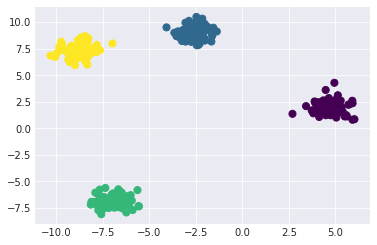

In [140]:
# STUDENT CODE HERE

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE)
kmeans.fit(X_blob)
labels_blob = kmeans.predict(X_blob)

# STUDENT CODE until HERE
#plotting is given
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels_blob,
            s=50, cmap='viridis');

**Question:** What do you observe? What difference can you see, if you compare the results of our own implementation and the scikit-learn solution?

**Answer:** In the scikit-learn solution, there is no overlap between different cluster.


## Choosing a suitable value for $k$
One obvious question that arises using K-Means is: how do we choose hyper-parameters  for the algorithm, such as the number of centers $k$? Since in general we have only the samples and the cluster they are assigned to, we need metrics only dependent on the sample data to select the perfect value for $k$. 



### Using the Silhouette Coefficient
One option is to use the silhouette coefficient we introduced above. With the help of silhouette, we can identify the optimal number of clusters $k$ (if we don't know it already from the data) by taking the number of clusters that maximizes the silhouette coefficient. 

Calculate the silhouette coefficient for different values of $k$ and select the optimal number! The code to plot different ks versus the score has been written for you, so fill out the rest of the code.


In [142]:
def calculate_k_silhouette(X, k_min, k_max):
# STUDENT CODE HERE

    ks = np.arange(k_min, k_max+1)
    scores = []
    
    for k in ks:
        kmeans = KMeans(n_clusters= k, random_state=RANDOM_STATE).fit(X)
        labels_pred = kmeans.predict(X)
        scores.append(silhouette_score(X,labels_pred))

# STUDENT CODE until HERE
    return ks, scores

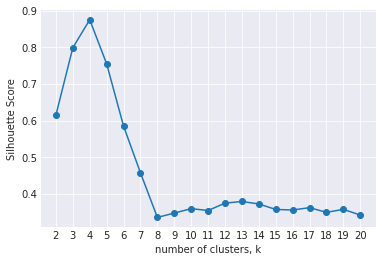

In [144]:
#set random state
RANDOM_STATE = 42
# call your function with a suitable range for k
# STUDENT CODE HERE

ks, silhouette_scores = calculate_k_silhouette(X_blob, 2, 20)

# STUDENT CODE until HERE
# Plot ks vs silhouette coefficient
plt.plot(ks, silhouette_scores, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.show()

**Question:** What number of clusters should we choose according to the silhouette score?

**Answer:** We should use four clusters since there is a definite peak in the silhouette score.


### Using the Elbow Method
A good clustering has tight clusters and the samples in each cluster are bunched together. Hence, we can evaluate the spread of each cluster whereby a lower spread is better. K-means is inherently optimizing the sum of squared distances between the observations and their centroids. This is the *loss function* for the k-Means algorithm. 

$$ J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$




We can use the loss function as a quality measure. This seems reasonable -- we want our observations to be as close to their centroids as possible. Now evaluate what the quality measure via the loss function is indicating for different values of $k$!

The code to plot different ks versus the loss has been written for you, so fill out the rest of the code.

The main steps are:
- define the list of k-values
- For each of the values of k, perform the following steps:
  - Fit a K-Means model to the given data samples with k clusters
  - Calculate the loss

In [148]:
def calculate_k_loss(X, k_min, k_max):
# STUDENT CODE HERE

    ks = np.arange(k_min, k_max+1)
    losses = []
    
    for k in ks:
        kmeans = KMeans(n_clusters= k, random_state=RANDOM_STATE).fit(X)
        labels_pred = kmeans.predict(X)
        losses.append(kmeans.inertia_)

# STUDENT CODE until HERE
    return ks, losses


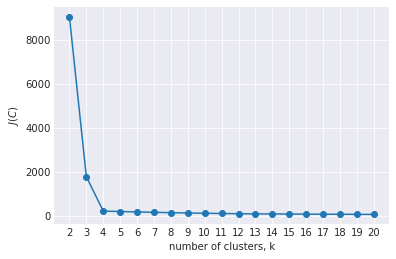

In [149]:
#set random state
RANDOM_STATE = 42
# call your function with a suitable range for k
# STUDENT CODE HERE

ks, losses = calculate_k_loss(X_blob, 2, 20)

# STUDENT CODE until HERE
# Plot ks vs inertias
plt.plot(ks, losses, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('$ J(C)$')
plt.xticks(ks)
plt.show()

**Question:** What problem do we have, if we just try to minimize the loss $J(C_k)$ ?

**Answer:** We would have to chose an infinitly high number for k.



**Question:** What can we do to avoid that Problem? How many clusters should we then choose in our case?

**Answer:** We can compromise by using a number for k which takes both, the maximization of the silhouette score and the minimization of the loss into account.


To sum up, the process of selecting the number of clusters is typically an imprecise art, and it is _very_ difficult to infer anything about the "real" number of clusters in the data from running k-means (in fact, you should really never try to do this).

# Appendix

## K-Means issues

Inherently, K-means is NP-hard. For $d$ dimensions, $k$ clusters, and $n$ observations, we will find a solution in $O(n^{d k+1})$ time. There are some heuristics to deal with this; an example is MiniBatch K-means, which takes portions (batches) of data instead of fitting the whole dataset and then moves centroids by taking the average of the previous steps. Compare the implementation of K-means and MiniBatch K-means in the [sckit-learn documentation](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html).

The [implemetation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) of the algorithm using `scikit-learn` has its benefits such as the possibility to state the number of initializations with the `n_init` function parameter, which enables us to identify more robust centroids. Moreover, these runs can be done in parallel to decrease the computation time.

### K-means clustering with better initialization: KMeans++
Given enough time, K-means will always converge, however this may be to a local minimum. As we have seen, this is highly dependent on the initialization of the centroids. This led to the development of many approaches to address a potential poor clustering: e.g. the computation is often done several times, with different random initializations of the centroids. Another option would be to take the clustering with lowest loss. But the most common heuristic is k-means++: when we are initializing the cluster centers, we don’t select $\mu_{i}$ randomly from all clusters. Instead, we choose $\mu_{i}$ sequentially, sampled with a probability proportional to the minimum squared distance to all other centroids. This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization. After these centers are initialized, we run k-means as normal.

### Pseudocode for K-means++

Given: Dataset $\large \mathbf{X} \in \mathbb{R}^{m \times d}$, number of clusters $\large k$

- Initialize:

  - Choose $\large \mu_{1}$ = Random$\large (\mathbf{X})$

- For $\large j = 2, \dots,k$:

  - For every point $\large x_i$ in $\mathbf{X}$:

    - Get the nearest cluster $\large \mu_{j'}$  ($\large j' < j$) center already found
    
    - Compute the distance $\large D(x_i)$ to the nearest cluster center $\large \mu_{j'}$
    
  - Compute the probabilty $\large p_{x_i} \propto D(x_i)^2$ of every point $\large x_i$ to be chosen as new center
    
  - Choose $\large \mu^{j}$ =  Random $\large ( \mathbf{X}, p )$

## A comparison of the clustering algorithms in scikit-learn
Taken from https://scikit-learn.org/stable/modules/clustering.html#clustering

| Method name                  | Parameters                                              | Scalability                                                 | Usecase                                                                   | Geometry (metric used)                       |
|------------------------------|---------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means                      | number of clusters                                      | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters  | Distances between points                     |
| Affinity propagation         | damping, sample preference                              | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Graph distance (e.g. nearest-neighbor graph) |
| Mean-shift                   | bandwidth                                               | Not scalable with n_samples                                 | Many clusters, uneven cluster size, non-flat geometry                     | Distances between points                     |
| Spectral clustering          | number of clusters                                      | Medium n_samples, small n_clusters                          | Few clusters, even cluster size, non-flat geometry                        | Graph distance (e.g. nearest-neighbor graph) |
| Ward hierarchical clustering | number of clusters                                      | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints                          | Distances between points                     |
| Agglomerative clustering     | number of clusters, linkage type, distance              | Large n_samples and n_clusters                              | Many clusters, possibly connectivity constraints, non Euclidean distances | Any pairwise distance                        |
| DBSCAN                       | neighborhood size                                       | Very large n_samples, medium n_clusters                     | Non-flat geometry, uneven cluster sizes                                   | Distances between nearest points             |
| Gaussian mixtures            | many                                                    | Not scalable                                                | Flat geometry, good for density estimation                                | Mahalanobis distances to centers             |
| Birch                        | branching factor, threshold, optional global clusterer. | Large n_clusters and n_samples                              | Large dataset, outlier removal, data reduction.                           | Euclidean distance between points            |

## More metrics for evaluation of clustering results
All the metrics described below are implemented in `sklearn.metrics`.

**Adjusted Rand Index (ARI)**

Here, we assume that the true labels of objects are known. This metric does not depend on the labels' values but on the data cluster split. Let $N$ be the number of observations in a sample. Let $a$ to be the number of observation pairs with the same labels and located in the same cluster, and let $b$ to be the number of observations with different labels and located in different clusters. The Rand Index can be calculated using the following formula: $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$ 
In other words, it evaluates a share of observations for which these splits (initial and clustering result) are consistent. The Rand Index (RI) evaluates the similarity of the two splits of the same sample. In order for this index to be close to zero for any clustering outcomes with any $n$ and number of clusters, it is essential to scale it, hence the Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

This metric is symmetric and does not depend in the label permutation. Therefore, this index is a measure of distances between different sample splits. $\text{ARI}$ takes on values in the $[-1, 1]$ range. Negative values indicate the independence of splits, and positive values indicate that these splits are consistent (they match $\text{ARI} = 1$).

**Adjusted Mutual Information (AMI)**

This metric is similar to $\text{ARI}$. It is also symmetric and does not depend on the labels' values and permutation. It is defined by the [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory) function and interprets a sample split as a discrete distribution (likelihood of assigning to a cluster is equal to the percent of objects in it). The $MI$ index is defined as the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) for two distributions, corresponding to the sample split into clusters. Intuitively, the mutual information measures the share of information common for both clustering splits i.e. how information about one of them decreases the uncertainty of the other one.

Similarly to the $\text{ARI}$, the $\text{AMI}$ is defined. This allows us to get rid of the $MI$ index's increase with the number of clusters. The $\text{AMI}$ lies in the $[0, 1]$ range. Values close to zero mean the splits are independent, and those close to 1 mean they are similar (with complete match at $\text{AMI} = 1$).

**Homogeneity, completeness, V-measure**

Formally, these metrics are also defined based on the entropy function and the conditional entropy function, interpreting the sample splits as discrete distributions: $$h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$
where $K$ is a clustering result and $C$ is the initial split. Therefore, $h$ evaluates whether each cluster is composed of same class objects, and $c$ measures how well the same class objects fit the clusters. These metrics are not symmetric. Both lie in the $[0, 1]$ range, and values closer to 1 indicate more accurate clustering results. These metrics' values are not scaled as the $\text{ARI}$ or $\text{AMI}$ metrics are and thus depend on the number of clusters. A random clustering result will not have metrics' values closer to zero when the number of clusters is big enough and the number of objects is small. In such a case, it would be more reasonable to use $\text{ARI}$. However, with a large number of observations (more than 100) and the number of clusters less than 10, this issue is less critical and can be ignored.

$V$-measure is a combination of $h$, and $c$ and is their harmonic mean:
$$v = 2\frac{hc}{h+c}.$$
It is symmetric and measures how consistent two clustering results are.